# Banknote serial number recognition

A system for banknote serial number recognition.

## Prerequsites

#### Importing modules

In [1]:
import os
import re
import glob
from collections import defaultdict

import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

tf.__version__

'2.1.0'

#### Configuration

In [2]:
train_locations = [
    "./dataset/SNRdataset/EUR/train",
    "./dataset/SNRdataset/JPY_1K_5K/train",
    "./dataset/SNRdataset/JPY_2K_10K/train",
    "./dataset/SNRdataset/KRW/train"
]

test_locations = [
    "./dataset/SNRdataset/EUR/test",
    "./dataset/SNRdataset/JPY_1K_5K/test",
    "./dataset/SNRdataset/JPY_2K_10K/test",
    "./dataset/SNRdataset/KRW/test"
]

## Exploring image data

#### Loading data
Going through every directory in the dataset and loading all the images into numpy arrays using Pillow.

In [3]:
def load_data(locations: str):
    data = []
    for location in locations:
        for path in glob.glob(location + "/*"):
            image = np.array(Image.open(path).convert('L'), dtype=np.uint8)
            serial = os.path.splitext(os.path.basename(path))[0].split('_')[-1].replace('z', '')
            data.append({"image": image, "serial": serial})

    return data

In [4]:
train_data = load_data(train_locations)
test_data = load_data(test_locations)

#### Subset of the data
Plotting a random subset of 25 serial number images and their labeling to verify if they are loaded properly.

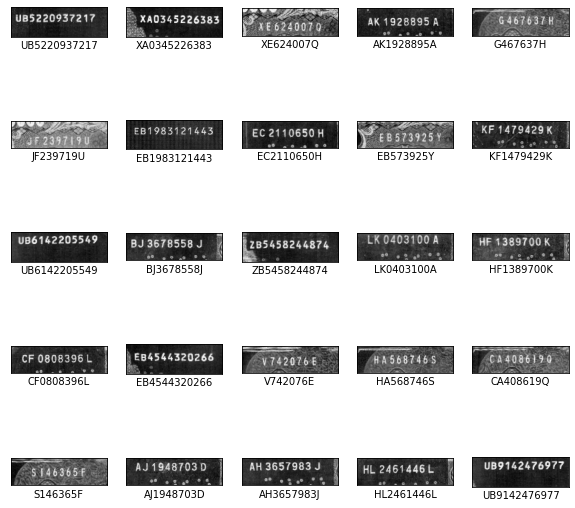

In [5]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    image_index = random.randint(0, len(train_data))
    plt.imshow(train_data[image_index]["image"], cmap=plt.cm.binary)
    plt.xlabel(train_data[image_index]["serial"])
plt.show()

#### Data distribution
A bar chart displaying the number of Train/Test images in each category.

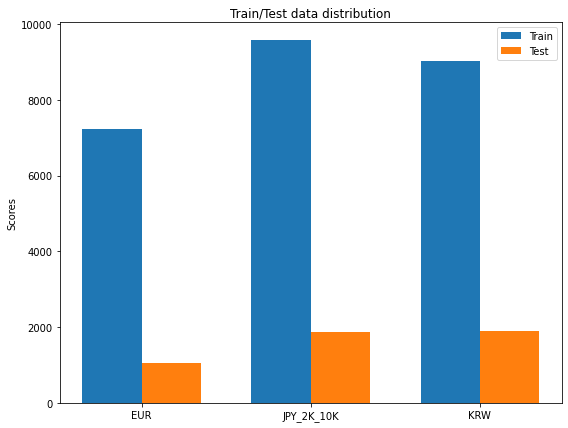

In [28]:
train_means = [len(glob.glob(path + '/*')) for path in train_locations]
test_means = [len(glob.glob(path + '/*')) for path in test_locations]

ind = np.arange(len(train_locations)) 
plt.figure(figsize=(9, 7))
width = 0.35       
plt.bar(ind, train_means, width, label='Train')
plt.bar(ind + width, test_means, width,
    label='Test')

plt.ylabel('Scores')
plt.title('Train/Test data distribution')

plt.xticks(ind + width / 2, [path.split('/')[-2] for path in train_locations])
plt.legend(loc='best')
plt.show()

#### Image resolution distribution
A bar chart containing all the image resolutions within the dataset. Whether there is more than one column, images should be resized.

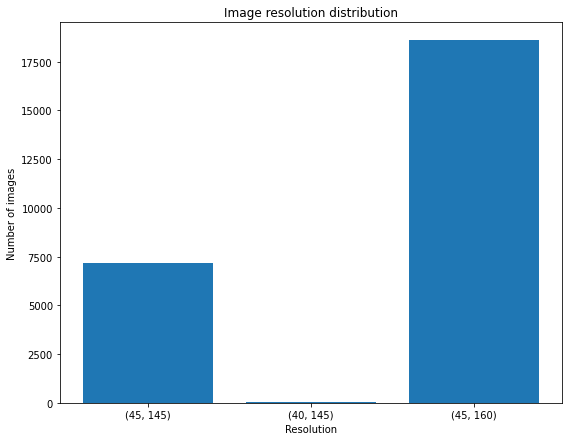

In [27]:
resolutions = defaultdict(lambda: 0)
for item in train_data:
    resolutions[item["image"].shape] += 1

x = resolutions.keys()
energy = resolutions.values()

x_pos = [i for i, _ in enumerate(x)]

plt.figure(figsize=(9, 7))
plt.bar(x_pos, energy)
plt.xlabel("Resolution")
plt.ylabel("Number of images")
plt.title("Image resolution distribution")

plt.xticks(x_pos, x)

plt.show()